Analisi risultati calibrazione

Author: Pietro Mazzon
Mail: pietro.mazzon@polimi.it
Date: 04/11/2024

In [1]:
# import libraries
import os

import pandas as pd
print('Pandas version: '+pd.__version__) #check version

import numpy as np
print('Numpy version: '+np.__version__) #check version

import matplotlib as mpl
import matplotlib.pyplot as plt
print('Matplotlib version: '+mpl.__version__) #check version

Pandas version: 1.5.3
Numpy version: 1.23.5
Matplotlib version: 3.7.0


In [2]:
# set WD
cwd = os.getcwd()
print(cwd)

d:\Pietro\PhD\ENI-Rewind\Priolo\CS9\Analisi


In [3]:
# Read the DF
file = 'Residuals_CS9ext_v12_new.csv' # inserire nome del file di input
outp_file = 'statistics_v12_new.csv' # inserire nome del file di output
path = os.path.join(cwd,file)
df = pd.read_csv(path)

In [ ]:
# explore DF
#df.head() # firts records of DF
#df.tail() # last records of DF
#df.shape # print dimensions of DF
df.dtypes # variable types

Name         object
X           float64
Y           float64
Layer       float64
Observed    float64
Computed    float64
Weight      float64
Group       float64
Residual    float64
dtype: object

In [5]:
# save column names to a list
columns = df.columns.to_list()
columns

['Name',
 'X',
 'Y',
 'Layer',
 'Observed',
 'Computed',
 'Weight',
 'Group',
 'Residual']

In [6]:
# check null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177 entries, 0 to 176
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      177 non-null    object 
 1   X         177 non-null    float64
 2   Y         164 non-null    float64
 3   Layer     164 non-null    float64
 4   Observed  164 non-null    float64
 5   Computed  164 non-null    float64
 6   Weight    164 non-null    float64
 7   Group     164 non-null    float64
 8   Residual  164 non-null    float64
dtypes: float64(8), object(1)
memory usage: 12.6+ KB


In [7]:
# remove all records with null values -> statistics calculated by GV
df.dropna(how='any',inplace=True)
df.reset_index(inplace=True, drop=True) # reset indexes without keeping the old ones
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164 entries, 0 to 163
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      164 non-null    object 
 1   X         164 non-null    float64
 2   Y         164 non-null    float64
 3   Layer     164 non-null    float64
 4   Observed  164 non-null    float64
 5   Computed  164 non-null    float64
 6   Weight    164 non-null    float64
 7   Group     164 non-null    float64
 8   Residual  164 non-null    float64
dtypes: float64(8), object(1)
memory usage: 11.7+ KB


In [8]:
# create nwe DF without zero-weighted targets
df2 = df.copy() # must copy, otherwise it is still connected to the original DF
df2 = df2[df2.Weight > 0]
df2.reset_index(inplace=True, drop=True) # reset indexes without keeping the old ones
df2.shape

(152, 9)

In [9]:
# add column weighted residuals
df2['W_res'] = (df2['Observed'] - df2['Computed'])*df2['Weight']
df2['W_res']

0     -0.447924
1      0.067505
2     -0.060726
3     -0.018454
4     -0.130985
         ...   
147   -0.279002
148   -0.449812
149    0.095045
150   -0.389864
151   -0.182018
Name: W_res, Length: 152, dtype: float64

In [10]:
cols_sel = ['Observed','Computed','W_res']
#df2.filter(cols_sel).describe()

mean = df2['W_res'].mean()
abs_mean = df2['W_res'].abs().mean()
std_dev = df2['W_res'].std()
phi = (df2['W_res']**2).sum()
rmse = np.sqrt(((df2['W_res']) ** 2).mean())
minobs = df2['Observed'].min()
maxobs = df2['Observed'].max()
minres = df2['W_res'].min()
maxres = df2['W_res'].max()
rangeobs = maxobs - minobs
numobs  = df2['Observed'].count()
scaled_mean = mean / rangeobs
scaled_abs_mean = abs_mean / rangeobs
scaled_std = std_dev / rangeobs
scaled_rmse = rmse / rangeobs

# Creare un dizionario per salvare i valori calcolati in CSV
stats = {
    'Statistica': ['Media (m)', 'Media assoluta (m)', 'Deviazione standard (m)', 'Somma del quadrato degli scarti (m$^2$)',
                 'RMS Error (m)', 'Residuo Min (m)', 'Residuo Max (m)', 'Range osservazioni (m)',
                 '# osservazioni', 'Media scalata (m)', 'Media assoluta scalata (m)',
                 'Dev. standard scalata (m)', 'RMSE scalato'],
    'Valore': [mean, abs_mean, std_dev, phi, rmse, minres, maxres,
            rangeobs, numobs, scaled_mean, scaled_abs_mean,
            scaled_std, scaled_rmse]
}

# Creare un DataFrame dai dati statistici
df_stats = pd.DataFrame(stats)

df_stats = df_stats.round(2) #arrotonda il DF con due cifre

# Salvare il DataFrame in un file Excel
df_stats.to_csv(outp_file, index=False)

print("Statistics have been saved to {statistics_v12.csv}")


Statistics have been saved to {statistics_v12.csv}


Plot

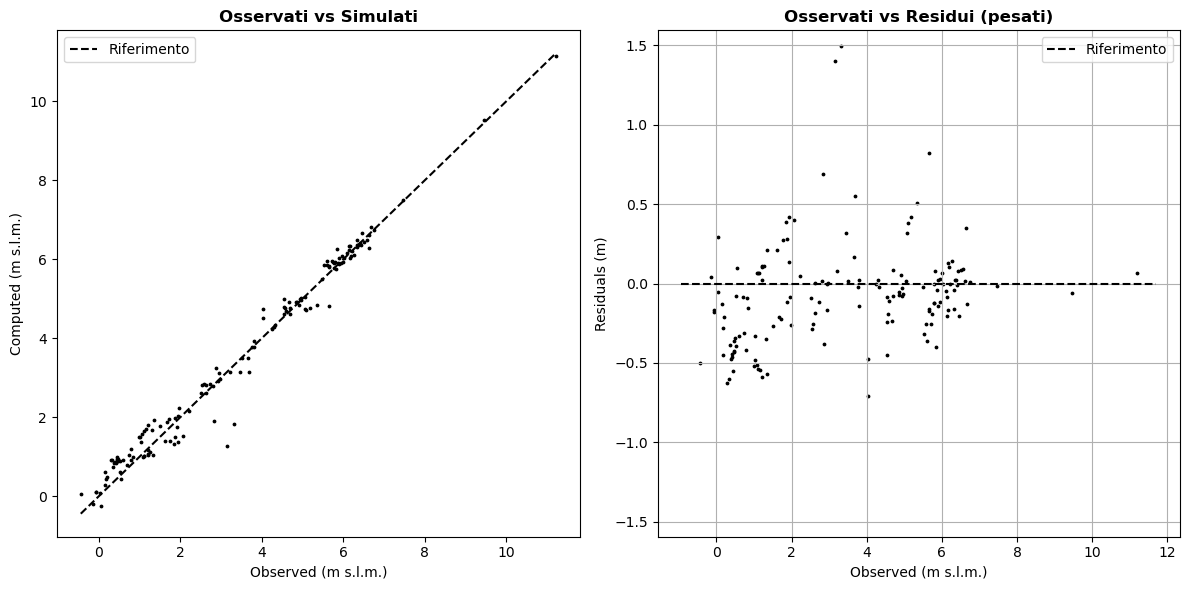

In [11]:
# Crea il grafico a dispersione
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Primo grafico: Osservati vs Simulati
ax1.scatter(df2['Observed'], df2['Computed'], c='black', s=3)
ax1.set_title('Osservati vs Simulati', fontweight='bold')
ax1.set_xlabel('Observed (m s.l.m.)')
ax1.set_ylabel('Computed (m s.l.m.)')

# Aggiungi la bisettrice
max_val = max(df2['Observed'].max(), df2['Computed'].max())
min_val = min(df2['Observed'].min(), df2['Computed'].min())
ax1.plot([min_val, max_val], [min_val, max_val], color='black', linestyle='--', label='Riferimento')

# Aggiungi la legenda
ax1.legend()

# Secondo grafico: Osservati vs Residui
ax2.scatter(df2['Observed'], df2['W_res'], c='black', s=3)
ax2.set_title('Osservati vs Residui (pesati)', fontweight='bold')
ax2.set_xlabel('Observed (m s.l.m.)')
ax2.set_ylabel('Residuals (m)')
max_res = max(df2['W_res'].max(),abs(df2['W_res'].min()))
tol = 0.1 #aggiungo tolleranda al valore impostato per l'asse
ax2.set_ylim(-max_res-tol,max_res+tol)

# Aggiungi linea sull'asse x
ax2.plot([min_val-0.5, max_val+0.5], [0, 0], color='black', linestyle='--', label='Riferimento')

# Aggiungi la legenda
ax2.legend()

# Mostra il grafico
plt.grid()
plt.tight_layout()  # Per migliorare il layout
plt.show()
